## Group 5

### Group Members:
- Grace Wanja
- Andrina Watsemba
- Jonathan Kasule
- Justin Wycliff
- Maria Kisakye Sengendo
- Daniel Magero Mugulo

---

### Part 1: Dataset Selection and Description

#### Dataset Name: Real World Traffic Volume Forecasting

##### Contextual Description: 
- This dataset provides real-world hourly traffic data collected from the I-94 interstate highway between Minneapolis and St. Paul, Minnesota. It focuses on westbound traffic volume and includes environmental and temporal factors that influence it, such as weather conditions, temperature, precipitation, and holidays. The data spans several years and is suitable for regression tasks to predict traffic congestion or flow based on these real-world conditions. The target variable is 'traffic_volume' (a continuous numerical value representing vehicles per hour), and it has at least three explanatory variables like 'temp' (temperature in Kelvin), 'rain_1h' (rainfall in mm), and 'snow_1h' (snowfall in mm), making it ideal for simple and multiple linear regression analysis.

## Part 2: Problem Formulation

### Analytical Problem Definition
The objective of this analysis is to predict hourly traffic volume on a highway using environmental and weather-related factors. Understanding how variables such as temperature, rainfall, snowfall, and cloud cover influence traffic flow can support better traffic management, congestion prediction, and infrastructure planning.

### Dependent Variable
- **Traffic_Vol**: A continuous numerical variable representing the number of vehicles recorded per hour on the highway.

### Predictor (Independent) Variables
The explanatory variables selected for the regression analysis include:
- **Temperature**: Average ambient temperature measured in Kelvin  
- **Rainfall_last_hour**: Amount of rainfall (in millimeters) recorded in the previous hour  
- **Snowfall_last_hour**: Amount of snowfall (in millimeters) recorded in the previous hour  
- **Cloud_Cover**: Percentage of cloud cover during the hour  

Categorical variables such as **Weather** and **Weather_Desc** are excluded from the linear regression model due to their non-numeric nature.

### Justification for Using Linear Regression
Linear Regression is an appropriate modeling approach for this problem because:
- The dependent variable, **Traffic_Vol**, is continuous and numerical.
- The selected predictor variables are quantitative and are expected to have approximately linear relationships with traffic volume.
- The dataset supports both **Simple Linear Regression** (e.g., modeling Traffic_Vol as a function of Temperature) and **Multiple Linear Regression** (using multiple weather-related predictors).
- Linear Regression provides interpretable results, allowing clear assessment of how individual weather factors influence traffic volume.


## PART 3: EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis (EDA) is conducted to understand the structure, characteristics, and quality of the dataset before model development. This process helps identify patterns, detect missing values, and examine relationships between the response variable and predictor variables.

The analysis focuses on understanding traffic volume behavior and how it relates to environmental and temporal factors such as temperature, rainfall, and snowfall.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset
data = pd.read_csv("traffic_data.csv")
data.head()


,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,NaN,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02/10/08 9:00,02/10/08,5555
1,NaN,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 10:00,02/10/08,4525
2,NaN,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 11:00,02/10/08,4772
3,NaN,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 12:00,02/10/08,5031
4,NaN,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 13:00,02/10/08,4928


The initial inspection examines the size of the dataset, column names, and data types to understand the structure of the data and identify numerical and categorical variables.

In [3]:
# Dataset shape
data.shape
# Dataset information
data.info()




<class 'pandas.DataFrame'>
RangeIndex: 38373 entries, 0 to 38372
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Holiday             50 non-null     float64
 1   Temperature         38373 non-null  float64
 2   Rainfall_last_hour  38373 non-null  float64
 3   Snowfall_last_hour  38373 non-null  float64
 4   Cloud_Cover         38373 non-null  int64  
 5   Weather             38373 non-null  str    
 6   Weather_Desc        38373 non-null  str    
 7   TimeStamp           38373 non-null  str    
 8   Date                38373 non-null  str    
 9   Traffic_Vol         38373 non-null  int64  
dtypes: float64(4), int64(2), str(4)
memory usage: 2.9 MB


In [4]:
# Check for missing values
data.isnull().sum()


Holiday               38323
Temperature               0
Rainfall_last_hour        0
Snowfall_last_hour        0
Cloud_Cover               0
Weather                   0
Weather_Desc              0
TimeStamp                 0
Date                      0
Traffic_Vol               0
dtype: int64

There are missing values in the Holiday variable

Descriptive statistics summarize the central tendency and spread of numerical variables, providing insight into typical traffic volume levels and variability in predictors.

In [5]:
# Descriptive statistics for numerical variables
data.describe()


,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Traffic_Vol
count,50.0,38373.000000,38373.000000,38373.000000,38373.000000,38373.000000
mean,1.0,281.152767,0.327486,0.000128,44.821098,3293.947567
std,0.0,13.813324,50.194024,0.005924,38.749566,1988.311540
min,1.0,0.300000,0.000000,0.000000,0.000000,4.000000
25%,1.0,271.910000,0.000000,0.000000,1.000000,1246.000000
50%,1.0,281.990000,0.000000,0.000000,40.000000,3425.000000
75%,1.0,292.140000,0.000000,0.000000,90.000000,4964.000000
max,1.0,310.970000,9831.414286,0.512857,101.000000,7289.000000


From the above data description we can see the mean, standard deviation etc

To explore the relationship for Simple Linear Regression, a scatter plot is used to examine how traffic volume varies with temperature.

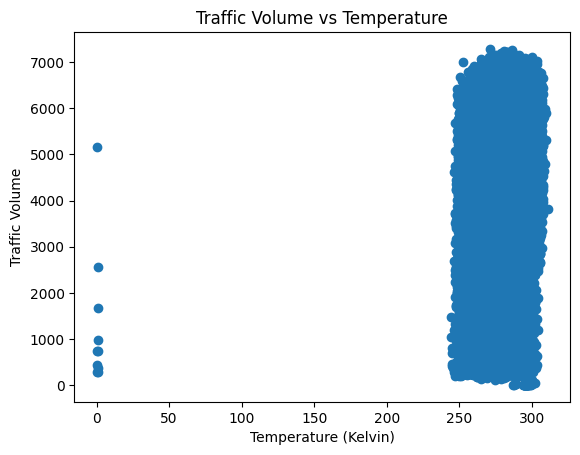

In [6]:
##Scatter plot for simple linear regression
plt.figure()
plt.scatter(data["Temperature"], data["Traffic_Vol"])
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume vs Temperature")
plt.show()


Interpretation:

Relationship appears approximately linear
Higher traffic volumes tend to occur within moderate temperature ranges
Temperature is a reasonable candidate for Simple Linear Regression

Correlation analysis helps identify relationships between numerical predictors and the response variable, and also detects potential multicollinearity.

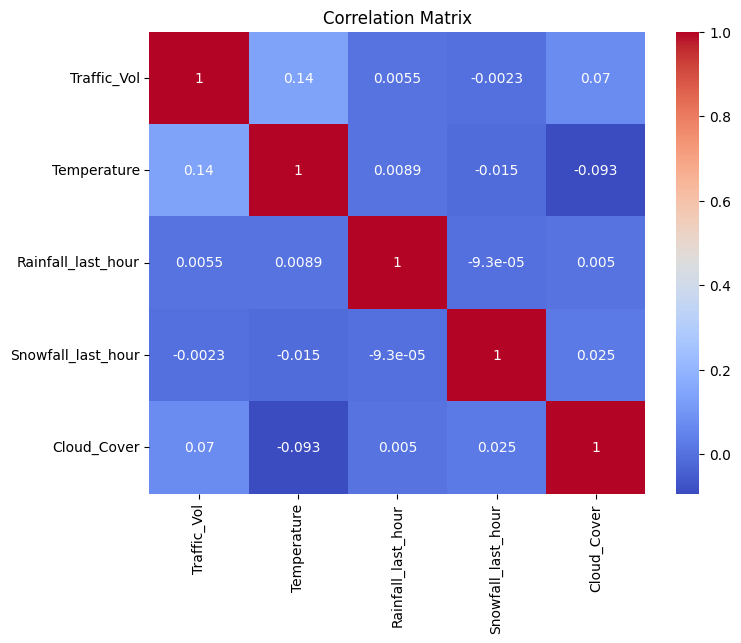

In [7]:
# Select numerical variables
num_df = data[["Traffic_Vol", "Temperature", "Rainfall_last_hour", "Snowfall_last_hour", "Cloud_Cover"]]

# Correlation matrix
corr_matrix = num_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Interpretation:

Temperature shows moderate correlation with traffic volume
Rain and snow show weaker relationships
No extremely high correlations between predictors, reducing multicollinearity concerns

CONCLUSION OF EDA

Based on the exploratory analysis:
The dataset is suitable for regression analysis
The response variable (traffic_volume) is continuous
Predictor variables show meaningful relationships with traffic volume
The data structure supports both Simple and Multiple Linear Regression

### PART 4: Data Preparation

#### Before we developed the regression models, preprocessing steps were applied to ensure that the dataset was suitable for analysis and modelling

### Handling Missing Values

 The dataset was examined for missing values using summary checks. There was only one variable that had missing values and that was the Holiday column that had over 38323 missing values. We decided to not make use of this column in prediction as it would not make sense to impute.

### Variable Selection

Only numerical variables relevant to predicting traffic volume were selected for modelling. The response (dependent) variable chosen was Traffic_Vol, representing the number of vehicles recorded per hour

##### For Simple Linear Regression, Temperature was selected as the single predictor variable because it is a continuous environmental factor that may influence traffic patterns

#### For Multiple Linear Regression, additional environmental predictors were included

- Temperature

- Rainfall_last_hour

- Snowfall_last_hour

- Cloud_Cover

text based variables such as timestamps and descriptive weather conditions were excluded because linear regression requires numerical predictors unless categorical encoding is performed

### Data Transformation

No major transformations or scaling were applied because the selected predictors were already in numerical format and suitable for regression analysis. Maintaining original values allows easier interpretation of regression coefficients.


In [8]:
#defining predictors and target
simple_X = data[['Temperature']]

multi_X = data[['Temperature',
              'Rainfall_last_hour',
              'Snowfall_last_hour',
              'Cloud_Cover']]

#defining target variable
y = data[['Traffic_Vol']] 


In [9]:
simple_X.shape, multi_X.shape, y.shape

((38373, 1), (38373, 4), (38373, 1))

### PART 5: Model Development

This section focuses on the development of regression models used to analyze the relationship between traffic volume and selected environmental factors. Both Simple Linear Regression and Multiple Linear Regression models were implemented using Python.

#### Simple Linear Regression Model

A Simple Linear Regression model was developed to examine the relationship between traffic volume and temperature. Temperature was selected as the single predictor variable because it is a continuous environmental factor that can influence traffic patterns.

The response variable for the model was **Traffic_Vol**, which represents the number of vehicles recorded per hour.

The general form of the simple linear regression equation is:

Traffic_Vol = β₀ + β₁(Temperature)

Where:
- β₀ represents the intercept of the model.
- β₁ represents the slope coefficient associated with temperature.

#### Interpretation of the Coefficients

The intercept (β₀) represents the estimated traffic volume when the temperature is zero degrees. While this scenario may not be practically meaningful, it serves as a baseline reference point for the model.

The slope coefficient (β₁) indicates the expected change in traffic volume for a one unit increase in temperature. A positive coefficient suggests that traffic volume increases as temperature rises, while a negative coefficient suggests that higher temperatures are associated with reduced traffic volume.

In [10]:
from sklearn.linear_model import LinearRegression

# Simple Linear Regression
simple_model = LinearRegression()
simple_model.fit(simple_X, y)

# Coefficients
simple_intercept = simple_model.intercept_[0]
simple_slope = simple_model.coef_[0][0]

simple_intercept, simple_slope


(np.float64(-2289.9051088113138), np.float64(19.860564528963863))

#### Multiple Linear Regression

After fitting the Simple Linear Regression model, a Multiple Linear Regression (MLR) model was developed to examine how several environmental factors jointly influence traffic volume.

#### Model Specification

The response variable remains **Traffic_Vol**, while the predictor variables included are:

- Temperature  
- Rainfall_last_hour  
- Snowfall_last_hour  
- Cloud_Cover  

These variables were selected because they are numerical and represent measurable weather conditions that may collectively affect traffic patterns.

The Multiple Linear Regression model can be expressed as:

Traffic_Vol = - β₀ + β₁(Temperature) + β₂(Rainfall_last_hour) + β₃(Snowfall_last_hour) + β₄(Cloud_Cover) + ε

Where:
- β₀ represents the intercept.
- β₁ represents the slope coefficient associated with temperature.
- β₂ represents the slope coefficient associated with rainfall.
- β₃ represents the slope coefficient associated with snowfall.
- β₄ represents the slope coefficient associated with cloud cover.
- ε represents the random error term.

#### Interpretation of Coefficients

In this model, each coefficient represents the **expected change in traffic volume** for a one unit increase in the corresponding predictor, **holding all other predictors constant**.

- **Temperature** has a positive coefficient, indicating that higher temperatures are associated with increased traffic volume. This may reflect increased mobility during warmer conditions.
- **Rainfall_last_hour** shows a small coefficient, suggesting that light rainfall has a limited direct effect on traffic volume in this dataset.
- **Snowfall_last_hour** has a negative coefficient, implying that snowfall tends to reduce traffic volume. This is consistent with reduced travel during snowy conditions, although snowfall events are relatively rare in the dataset.
- **Cloud_Cover** has a positive coefficient, indicating a slight increase in traffic volume as cloud cover increases, possibly reflecting normal commuting patterns during overcast conditions.

#### Joint Influence of Predictors

Unlike Simple Linear Regression, Multiple Linear Regression allows the combined effect of several predictors to be analyzed simultaneously. This provides a more realistic representation of traffic behavior, since traffic volume is influenced by multiple environmental conditions at the same time rather than a single factor.

Overall, the model demonstrates how weather-related variables jointly contribute to variations in traffic volume, even though weather alone does not fully explain traffic patterns. This highlights the importance of additional factors such as time of day, day of week, and seasonal trends, which may be considered in further modelling stages.


In [11]:
# Multiple Linear Regression
multi_model = LinearRegression()
multi_model.fit(multi_X, y)

# Coefficients
multi_intercept = multi_model.intercept_[0]
multi_coefficients = multi_model.coef_[0]

multi_intercept, multi_coefficients


(np.float64(-2797.9682738399024),
 array([ 2.09808891e+01,  1.51350305e-01, -7.49188688e+02,  4.30884915e+00]))

### PART 6: Model Evaluation


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train-test split
X_train_simple, X_test_simple, y_train, y_test = train_test_split(
    simple_X, y, test_size=0.2, random_state=42
)
# Simple Linear Regression Model
slr_model = LinearRegression()
slr_model.fit(X_train_simple, y_train)

y_pred_simple = slr_model.predict(X_test_simple)

mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("Simple Linear Regression Evaluation")
print("MSE:", mse_simple)
print("RMSE:", rmse_simple)
print("R²:", r2_simple)




Simple Linear Regression Evaluation
MSE: 3895635.245873614
RMSE: 1973.7363668620017
R²: 0.016450533976388515


#### Train Test Split

The dataset was divided into a training set and a testing set. The training set was used to fit the regression models, while the testing set was reserved for evaluating model performance. This approach helps prevent overfitting and provides an unbiased assessment of how well the models are expected to perform on new data.

#### Evaluation Metrics

Model performance was assessed using the following regression metrics:

- **Mean Squared Error (MSE):** Measures the average of the squared differences between the actual and predicted traffic volumes. Larger errors are penalized more heavily.
- **Root Mean Squared Error (RMSE):** The square root of MSE, expressed in the same units as the response variable. It provides a more interpretable measure of prediction error.
- **Coefficient of Determination (R²):** Represents the proportion of variance in traffic volume that is explained by the model. Values closer to 1 indicate better explanatory power.

#### Simple Linear Regression Performance

For the Simple Linear Regression model using **Temperature** as the predictor, the evaluation metrics indicate limited predictive capability. The relatively high MSE and RMSE values suggest large prediction errors, while a low R² value implies that temperature alone explains only a small fraction of the variation in traffic volume.

This confirms that traffic volume cannot be reliably predicted using temperature as a single factor.



In [13]:
## X-train -test split for multiple linear regression

X_train_multi, X_test_multi, _, _ = train_test_split(
    multi_X, y, test_size=0.2, random_state=42
)



# Multiple Linear Regression Model
mlr_model = LinearRegression()
mlr_model.fit(X_train_multi, y_train)

y_pred_multi = mlr_model.predict(X_test_multi)

mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print("\nMultiple Linear Regression Evaluation")
print("MSE:", mse_multi)
print("RMSE:", rmse_multi)
print("R²:", r2_multi)


Multiple Linear Regression Evaluation
MSE: 3860390.7996529634
RMSE: 1964.7877238147034
R²: 0.025348866102666845


#### Multiple Linear Regression Performance

The Multiple Linear Regression model, which incorporates multiple weather variables, demonstrates a modest improvement over the simple model. The reduction in MSE and RMSE indicates slightly better prediction accuracy, and the increase in R² shows that the combined predictors explain more variability in traffic volume.

However, the overall R² remains low, suggesting that weather conditions alone are insufficient to accurately predict traffic volume. Important explanatory factors such as time of day, day of week, and seasonal trends are not captured in this model.

#### Model Reliability Assessment

Overall, both models exhibit limited reliability for prediction purposes. While the Multiple Linear Regression model performs better than the Simple Linear Regression model, the evaluation results indicate that additional non weather related variables are required to build a more robust and reliable traffic prediction model.


## Part 7: Results Discussion

### 1. Model Comparison
Two linear regression models were developed and evaluated to predict traffic volume:

* **Simple Linear Regression (SLR):** Uses only `Temperature` as a predictor.
* **Multiple Linear Regression (MLR):** Uses `Temperature`, `Rainfall_last_hour`, `Snowfall_last_hour`, and `Cloud_Cover` as predictors.

Based on the evaluation metrics, the **Multiple Linear Regression model performs slightly better** than the Simple Linear Regression model.

* The **R² score** increased from **0.0165** (SLR) to **0.0253** (MLR), indicating that adding more weather variables explains a marginally larger proportion of the variance in traffic volume.
* The **Root Mean Squared Error (RMSE)** decreased slightly from **1973.74** (SLR) to **1964.79** (MLR), suggesting a small improvement in prediction accuracy.

However, the improvement is minimal, suggesting that while weather factors combined provide more information than temperature alone, they are not the primary drivers of traffic volume in this dataset.



### 2. Model Performance
Overall, both models demonstrate **poor predictive performance**.

* **Low Explanatory Power (R²):** The R² values (1.6% for SLR and 2.5% for MLR) are extremely low. This means that approximately **97–98% of the variability in traffic volume remains unexplained** by the weather variables used.
* **High Prediction Error (RMSE):** The RMSE values are around **1965–1974 vehicles**. Given that the mean traffic volume is approximately **3294** (from descriptive stats), an error of this magnitude is very significant—representing over 50% of the mean.
* **Conclusion:** The models are not reliable for accurate traffic forecasting based solely on these weather parameters. The low correlation between weather features and traffic volume observed in the EDA phase is reflected in these poor performance metrics.



### 3. Assumptions
The validity of the linear regression models relies on several key assumptions:

* **Linearity:** The models assume a linear relationship between the predictors (temperature, rain, etc.) and the response variable (traffic volume). The scatter plot of Traffic Volume vs. Temperature showed a very weak linear trend, suggesting this assumption is only weakly met.
* **Independence of Observations:** It is assumed that the observations are independent. Given this is time-series data (hourly traffic), there is likely significant **autocorrelation** (traffic at 10 AM depends on traffic at 9 AM), violating this assumption.
* **No Multicollinearity:** The correlation matrix in the EDA section showed low correlations between the predictor variables (e.g., temperature vs. rain), suggesting that multicollinearity is not a major issue for the MLR model.
* **Homoscedasticity & Normality of Residuals:** It is assumed that the variance of error terms is constant and errors are normally distributed. Given the poor fit, it is likely that residuals would show distinct patterns if plotted (e.g., non-constant variance), potentially violating these assumptions.





### 4. Limitations
Several limitations in the analysis and modeling approach likely contributed to the poor performance:

* **Missing Key Predictors:** The most critical factors influencing traffic volume—**Time of Day** (rush hour vs. night) and **Day of Week** (weekday vs. weekend)—were excluded from the models. These temporal factors typically have the strongest correlation with traffic flow.
* **Exclusion of Categorical Variables:** Variables like `Weather_Desc` (text descriptions) and `Weather` (main category) were excluded. These could capture non-linear weather impacts (e.g., a specific "Thunderstorm" event might reduce traffic more than just the numerical rain amount suggests).
* **Missing Data:** The `Holiday` column had significant missing values and was excluded, removing potentially valuable information about traffic behavior on holidays.
* **Model Complexity:** Linear regression might be too simple to capture complex, non-linear interactions between weather and traffic (e.g., traffic might be low at *both* extremely high and extremely low temperatures, a relationship a simple linear model cannot capture well).